In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2023-03-10 22:25:13.682863: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/handsign_data.csv'
model_save_path = 'model/handsign_classifier-model.hdf5'
tflite_save_path = 'model/handsign_classifier-model.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
70/88 [======================>.......] - ETA: 0s - loss: 3.2587 - accuracy: 0.0472
Epoch 1: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 3s 11ms/step - loss: 3.2498 - accuracy: 0.0503 - val_loss: 3.1841 - val_accuracy: 0.0843
Epoch 2/1000
74/88 [========================>.....] - ETA: 0s - loss: 3.1465 - accuracy: 0.0950
Epoch 2: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 3.1294 - accuracy: 0.0996 - val_loss: 2.9644 - val_accuracy: 0.1405
Epoch 3/1000
74/88 [========================>.....] - ETA: 0s - loss: 2.9336 - accuracy: 0.1302
Epoch 3: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 2.9150 - accuracy: 0.1329 - val_loss: 2.6452 - val_accuracy: 0.1955
Epoch 4/1000
72/88 [=======================>......] - ETA: 0s - loss: 2.6996 - accuracy: 0.1581
Epoch 4: saving model to model/handsign_cl

88/88 [==============================] - 0s 2ms/step - loss: 1.4973 - accuracy: 0.4688 - val_loss: 0.8998 - val_accuracy: 0.7917
Epoch 30/1000
71/88 [=======================>......] - ETA: 0s - loss: 1.4808 - accuracy: 0.4641
Epoch 30: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.4669 - accuracy: 0.4707 - val_loss: 0.8705 - val_accuracy: 0.8125
Epoch 31/1000
69/88 [======================>.......] - ETA: 0s - loss: 1.4739 - accuracy: 0.4769
Epoch 31: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.4744 - accuracy: 0.4772 - val_loss: 0.8594 - val_accuracy: 0.8256
Epoch 32/1000
71/88 [=======================>......] - ETA: 0s - loss: 1.4531 - accuracy: 0.4828
Epoch 32: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.4540 - accuracy: 0.4814 - val_loss: 0.8321 - val_accuracy: 0.8200
Epoc

Epoch 58/1000
73/88 [=======================>......] - ETA: 0s - loss: 1.2470 - accuracy: 0.5472
Epoch 58: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.2380 - accuracy: 0.5511 - val_loss: 0.6459 - val_accuracy: 0.8517
Epoch 59/1000
72/88 [=======================>......] - ETA: 0s - loss: 1.2472 - accuracy: 0.5510
Epoch 59: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.2455 - accuracy: 0.5526 - val_loss: 0.6590 - val_accuracy: 0.8189
Epoch 60/1000
74/88 [========================>.....] - ETA: 0s - loss: 1.2375 - accuracy: 0.5598
Epoch 60: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.2354 - accuracy: 0.5617 - val_loss: 0.6488 - val_accuracy: 0.8336
Epoch 61/1000
75/88 [========================>.....] - ETA: 0s - loss: 1.2283 - accuracy: 0.5577
Epoch 61: saving model to model/hand

88/88 [==============================] - 0s 2ms/step - loss: 1.1621 - accuracy: 0.5870 - val_loss: 0.6079 - val_accuracy: 0.8520
Epoch 87/1000
72/88 [=======================>......] - ETA: 0s - loss: 1.1538 - accuracy: 0.5867
Epoch 87: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.1497 - accuracy: 0.5890 - val_loss: 0.6116 - val_accuracy: 0.8560
Epoch 88/1000
67/88 [=====================>........] - ETA: 0s - loss: 1.1371 - accuracy: 0.5908
Epoch 88: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.1486 - accuracy: 0.5889 - val_loss: 0.6069 - val_accuracy: 0.8869
Epoch 89/1000
70/88 [======================>.......] - ETA: 0s - loss: 1.1320 - accuracy: 0.5938
Epoch 89: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.1449 - accuracy: 0.5908 - val_loss: 0.6018 - val_accuracy: 0.8843
Epoc

Epoch 115/1000
70/88 [======================>.......] - ETA: 0s - loss: 1.0752 - accuracy: 0.6204
Epoch 115: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.0754 - accuracy: 0.6216 - val_loss: 0.5314 - val_accuracy: 0.8987
Epoch 116/1000
71/88 [=======================>......] - ETA: 0s - loss: 1.0670 - accuracy: 0.6156
Epoch 116: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.0683 - accuracy: 0.6169 - val_loss: 0.5292 - val_accuracy: 0.9285
Epoch 117/1000
70/88 [======================>.......] - ETA: 0s - loss: 1.0938 - accuracy: 0.6155
Epoch 117: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.0965 - accuracy: 0.6121 - val_loss: 0.5479 - val_accuracy: 0.9024
Epoch 118/1000
71/88 [=======================>......] - ETA: 0s - loss: 1.0722 - accuracy: 0.6166
Epoch 118: saving model to mo

70/88 [======================>.......] - ETA: 0s - loss: 1.0203 - accuracy: 0.6340
Epoch 143: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.0252 - accuracy: 0.6334 - val_loss: 0.5184 - val_accuracy: 0.9149
Epoch 144/1000
74/88 [========================>.....] - ETA: 0s - loss: 1.0232 - accuracy: 0.6387
Epoch 144: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.0215 - accuracy: 0.6365 - val_loss: 0.5312 - val_accuracy: 0.8899
Epoch 145/1000
75/88 [========================>.....] - ETA: 0s - loss: 1.0256 - accuracy: 0.6291
Epoch 145: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.0265 - accuracy: 0.6301 - val_loss: 0.5169 - val_accuracy: 0.9088
Epoch 146/1000
72/88 [=======================>......] - ETA: 0s - loss: 1.0459 - accuracy: 0.6299
Epoch 146: saving model to model/handsign_cl

71/88 [=======================>......] - ETA: 0s - loss: 1.0075 - accuracy: 0.6454
Epoch 171: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.0058 - accuracy: 0.6442 - val_loss: 0.4974 - val_accuracy: 0.8859
Epoch 172/1000
74/88 [========================>.....] - ETA: 0s - loss: 1.0035 - accuracy: 0.6420
Epoch 172: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 3ms/step - loss: 1.0012 - accuracy: 0.6420 - val_loss: 0.5037 - val_accuracy: 0.9072
Epoch 173/1000
68/88 [======================>.......] - ETA: 0s - loss: 1.0018 - accuracy: 0.6423
Epoch 173: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 1.0039 - accuracy: 0.6422 - val_loss: 0.5038 - val_accuracy: 0.9091
Epoch 174/1000
75/88 [========================>.....] - ETA: 0s - loss: 0.9858 - accuracy: 0.6499
Epoch 174: saving model to model/handsign_cl

69/88 [======================>.......] - ETA: 0s - loss: 0.9573 - accuracy: 0.6565
Epoch 199: saving model to model/handsign_classifier-model.hdf5
88/88 [==============================] - 0s 2ms/step - loss: 0.9610 - accuracy: 0.6558 - val_loss: 0.5073 - val_accuracy: 0.8893
Epoch 199: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

30/30 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.8893


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 158ms/step
[3.7167023e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1877029e-38
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0936391e-20 2.0262181e-29
 0.0000000e+00 4.3902496e-24 4.7333693e-04 1.8990641e-03 1.6166275e-34
 3.9020049e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.9762768e-01 0.0000000e+00 0.0000000e+00 1.6086517e-38 8.5184719e-36
 0.0000000e+00]
20


# Confusion matrix

118/118 [==============================] - 0s 910us/step


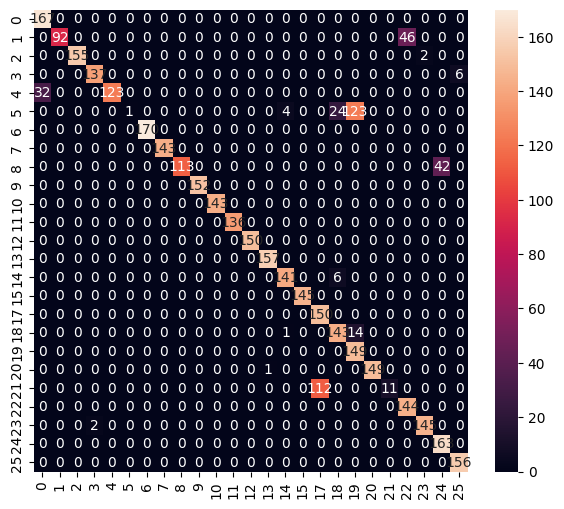

Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       167
           1       1.00      0.67      0.80       138
           2       1.00      0.99      0.99       157
           3       0.99      0.96      0.97       143
           4       1.00      0.79      0.88       155
           5       1.00      0.01      0.01       152
           6       1.00      1.00      1.00       170
           7       1.00      1.00      1.00       143
           8       1.00      0.73      0.84       155
           9       1.00      1.00      1.00       152
          10       1.00      1.00      1.00       143
          11       1.00      1.00      1.00       136
          12       1.00      1.00      1.00       150
          13       0.99      1.00      1.00       157
          14       0.97      0.96      0.96       147
          15       1.00      1.00      1.00       145
          17       0.57      1.00      0.73       150
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

2023-03-10 22:26:24.950342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1' with dtype float and shape [?,42]
	 [[{{node input_1}}]]
2023-03-10 22:26:25.058678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,42]
	 [[{{node inputs}}]]
2023-03-10 22:26:25.088038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1' with dtype float and shape [?,42]
	 [[{{node input_1}}]]
2023-03-10 22:2

INFO:tensorflow:Assets written to: /var/folders/jd/nyq8h0tj1k366zhybdqjgsqm0000gn/T/tmpnc7uut81/assets


INFO:tensorflow:Assets written to: /var/folders/jd/nyq8h0tj1k366zhybdqjgsqm0000gn/T/tmpnc7uut81/assets
2023-03-10 22:26:29.982868: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-03-10 22:26:29.995299: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-03-10 22:26:30.015099: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/jd/nyq8h0tj1k366zhybdqjgsqm0000gn/T/tmpnc7uut81
2023-03-10 22:26:30.018389: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-03-10 22:26:30.018420: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/jd/nyq8h0tj1k366zhybdqjgsqm0000gn/T/tmpnc7uut81
2023-03-10 22:26:30.056260: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-03-10 22:26:30.476042: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

7516

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.6908228e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0936391e-20 2.0262179e-29
 0.0000000e+00 4.3902160e-24 4.7333873e-04 1.8990567e-03 1.6166275e-34
 3.9019754e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.9762768e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.5184066e-36
 0.0000000e+00]
20
CPU times: user 1.54 ms, sys: 1.49 ms, total: 3.03 ms
Wall time: 2.2 ms
